# Fish Market Multiple Linear Regression

### In this notebook I developed a Regression model that can estimate weight of fish using multiple features.

### I used the fish market dataset that contains the following columns:
- **Species** of each fish.
- **Weight** of each fish(which is the target).
- **Length1** which is the vertical length of each fish.
- **Length2** which is the diagonal length of each fish.
- **Length3** which is the cross length of each fish.
- **Height** of each fish.
- **Width** of each fish.

## Importing Libraries & Reading Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
fish_df = pd.read_csv("Fish.csv")

In [5]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Data Wrangling & Cleaning

In [6]:
fish_df.shape ## Check dimensions

(159, 7)

In [7]:
fish_df.isna().sum() ## Check for missing values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
fish_df.duplicated().sum()  ## Chech for duplicates

0

In [9]:
fish_df.dtypes ## Check datatypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [10]:
fish_df.corr() ## Investigate correlations

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [11]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


#### Looks like there are outliers in the weight column as the max is much greater that the 75% value.

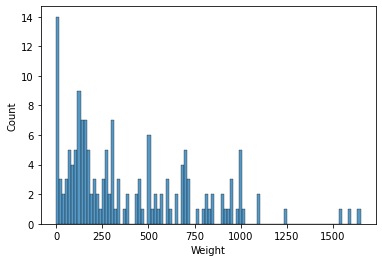

In [12]:
sns.histplot(x='Weight',data=fish_df,bins=100)  ## Draw histogram to investigate
plt.show()

In [13]:
fish_df.loc[fish_df['Weight'] > 1200,'Weight'] = None ## Handle outliers
fish_df.dropna(inplace = True)

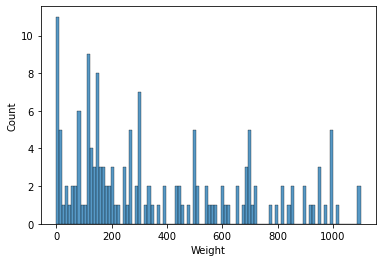

In [14]:
sns.histplot(x='Weight',data=fish_df,bins=100)  ## Check histogram after removing outliers
plt.show()

## Implementing Multiple Linear Regression

In [22]:
fish_target = fish_df['Weight']
fish_features = fish_df.drop(['Species','Weight'],axis = 1)   ## Split features and target

In [23]:
from sklearn.model_selection import train_test_split   ## Split data to train & test
features_train,features_test,target_train,target_test = train_test_split(fish_features,fish_target,test_size=0.2,random_state = 42) ## 42 عشان حجاب :) 

In [25]:
reg = LinearRegression()              ## Called linear regression
reg.fit(features_train,target_train)

LinearRegression()

In [26]:
prediction = reg.predict(features_test)  ## Used test data to test my model

In [31]:
mean_squared_error(target_test,prediction)

10023.911577572468

In [32]:
r2_score(target_test,prediction)

0.9129181007115347